## Adaptive Boosting (AdaBoost)

In [1]:
import pandas as pd
import pylab as plt
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import metrics
from tqdm import tqdm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def get_accuracy(X_train,X_test,y_train, y_test, model):
    return {"test Accuracy": metrics.accuracy_score(y_test, model.predict(X_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

In [4]:
def get_accuracy_bag(X,y,title,times=20,xlabel='Number Estimators',Learning_rate_=[0.2,0.4,0.6,1]):

    lines_array=['solid','--', '-.', ':']

    N_estimators=[n for n in range(1,100)]
    
    times=20
    train_acc=np.zeros((times,len(Learning_rate_),len(N_estimators)))
    test_acc=np.zeros((times,len(Learning_rate_),len(N_estimators)))


    #Iterate through different number of Learning rate  and average out the results  
    for n in tqdm(range(times)):
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
        for n_estimators in N_estimators:
            for j,lr in enumerate(Learning_rate_):


                model = AdaBoostClassifier(n_estimators=n_estimators+1,random_state=0,learning_rate=lr)


                model.fit(X_train,y_train)



                Accuracy=get_accuracy(X_train, X_test, y_train, y_test,  model)



                train_acc[n,j,n_estimators-1]=Accuracy['train Accuracy']
                test_acc[n,j,n_estimators-1]=Accuracy['test Accuracy']




    fig, ax1 = plt.subplots()
    mean_test=test_acc.mean(axis=0)
    mean_train=train_acc.mean(axis=0)
    ax2 = ax1.twinx()

    for j,(lr,line) in enumerate(zip(Learning_rate_,lines_array)): 

        ax1.plot(mean_train[j,:],linestyle = line,color='b',label="Learning rate "+str(lr))
        ax2.plot(mean_test[j,:],linestyle = line, color='r',label=str(lr))

    ax1.set_ylabel('Training accuracy',color='b')
    ax1.set_xlabel('No of estimators')
    ax1.legend()
    ax2.set_ylabel('Testing accuracy', color='r')
    ax2.legend()
    plt.show()

In [5]:
churn_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv")

churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [6]:
churn_df = churn_df[['tenure','age','address','income','ed','employ','equip','callcard','wireless','churn']]
churn_df['churn']= churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [7]:
X=churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]

In [8]:
y = churn_df['churn']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int32

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (140, 7) (140,)
Test set: (60, 7) (60,)


## Adaboost

In [10]:
from sklearn.ensemble import AdaBoostClassifier

In [11]:
n_estimators = 5
random_state = 0

In [12]:
model = AdaBoostClassifier(n_estimators=n_estimators,random_state=random_state)

In [13]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred 

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [14]:
print(get_accuracy(X_train, X_test, y_train, y_test,  model))

{'test Accuracy': 0.7333333333333333, 'train Accuracy': 0.7857142857142857}


In [18]:
model.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=209652396),
 DecisionTreeClassifier(max_depth=1, random_state=398764591),
 DecisionTreeClassifier(max_depth=1, random_state=924231285),
 DecisionTreeClassifier(max_depth=1, random_state=1478610112),
 DecisionTreeClassifier(max_depth=1, random_state=441365315)]

In [19]:
[ ("for weak classifiers {} the we get ".format(i+1),get_accuracy(X_train, X_test, y_train, y_test,  weak_classifiers)) for i,weak_classifiers in enumerate(model.estimators_)]

[('for weak classifiers 1 the we get ',
  {'test Accuracy': 0.75, 'train Accuracy': 0.6928571428571428}),
 ('for weak classifiers 2 the we get ',
  {'test Accuracy': 0.6, 'train Accuracy': 0.6714285714285714}),
 ('for weak classifiers 3 the we get ',
  {'test Accuracy': 0.6, 'train Accuracy': 0.6714285714285714}),
 ('for weak classifiers 4 the we get ',
  {'test Accuracy': 0.7833333333333333, 'train Accuracy': 0.75}),
 ('for weak classifiers 5 the we get ',
  {'test Accuracy': 0.43333333333333335,
   'train Accuracy': 0.42857142857142855})]

In [20]:
n_estimators=100
random_state=0

In [21]:
model = AdaBoostClassifier(n_estimators=n_estimators,random_state=random_state)
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [22]:
print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'test Accuracy': 0.7833333333333333, 'train Accuracy': 0.8357142857142857}


100%|██████████| 20/20 [02:32<00:00,  7.60s/it]


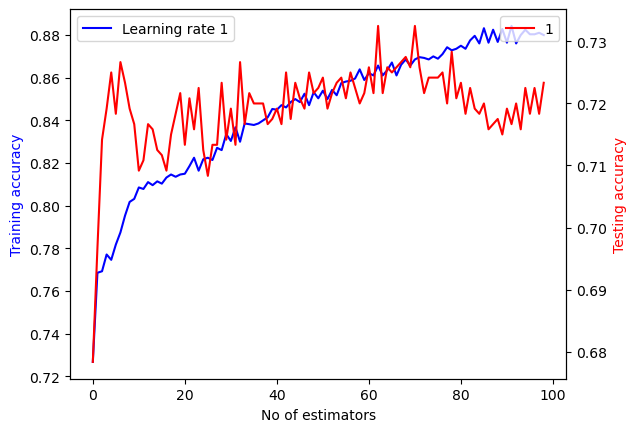

In [23]:
get_accuracy_bag(X,y,title="Training and Test Accuracy vs Weak Classifiers",Learning_rate_=[1],times=20,xlabel='Number Estimators')

In [24]:
n_estimators=100
random_state=0
learning_rate=0.7

In [25]:
model = AdaBoostClassifier(n_estimators=n_estimators,random_state=random_state,learning_rate=learning_rate)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'test Accuracy': 0.7666666666666667, 'train Accuracy': 0.8}


100%|██████████| 20/20 [10:08<00:00, 30.40s/it]


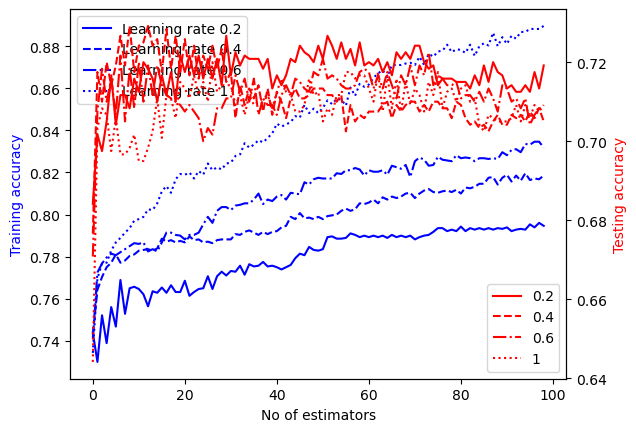

In [26]:
get_accuracy_bag(X,y,title="Training and Test Accuracy vs Weak Classifiers",Learning_rate_=[0.2,0.4,0.6,1],times=20,xlabel='Number Estimators')

## Changing the Base Classifier

In [27]:
from sklearn.svm import SVC

In [30]:
base_estimator = SVC(kernel = 'rbf', gamma = 1)

In [31]:
base_estimator.fit(X_train, y_train)

print(get_accuracy(X_train, X_test, y_train, y_test, base_estimator))

{'test Accuracy': 0.75, 'train Accuracy': 1.0}


In [34]:
algorithm='SAMME'

In [35]:
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'test Accuracy': 0.7666666666666667, 'train Accuracy': 0.8}


## Cancer Data Example

In [36]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv")

df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [37]:
df= df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]

In [38]:
X =  df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

X.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [39]:
y=df['Class']
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
model = AdaBoostClassifier()
model.get_params().keys()

dict_keys(['algorithm', 'estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [43]:
param_grid = {'learning_rate': [0.1*(n+1) for n in range(10)],
             'n_estimators' : [2*n+1 for n in range(10)],
              'algorithm':['SAMME', 'SAMME.R']}                

param_grid 

{'learning_rate': [0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6000000000000001,
  0.7000000000000001,
  0.8,
  0.9,
  1.0],
 'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
 'algorithm': ['SAMME', 'SAMME.R']}

In [44]:
search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy')
search.fit(X_train, y_train)

,estimator,AdaBoostClassifier()
,param_grid,"{'algorithm': ['SAMME', 'SAMME.R'], 'learning_rate': [0.1, 0.2, ...], 'n_estimators': [1, 3, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,estimator,None


In [45]:
search.best_score_

0.9670725604670558

In [46]:
search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 7}

In [47]:

print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

{'test Accuracy': 0.9562043795620438, 'train Accuracy': 0.9633699633699634}
